<a href="https://colab.research.google.com/github/markdevine/ET5003_SEM1_2021-2/blob/main/ET5003_KaggleCompetition_MarkDevine_19187289.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div>
<img src="https://drive.google.com/uc?export=view&id=1vK33e_EqaHgBHcbRV_m38hx6IkG0blK_" width="350"/>
</div> 

#**Artificial Intelligence - MSc**
##ET5003 - MACHINE LEARNING APPLICATIONS 

###Instructor: Enrique Naredo
###ET5003_KaggleCompetition

In [9]:
#@title Current Date
Today = '2021-10-11' #@param {type:"date"}


In [10]:
#@markdown ---
#@markdown ### Enter your details here:
Team_Number = "Team 2" #@param {type:"string"}
Student_ID&Name = "Mark Devine 19187289" #@param {type:"string"}
Student_ID&Name = "Mark Devine 19187289" #@param {type:"string"}
Student_ID&Name = "" #@param {type:"string"}
Student_ID&Name = "" #@param {type:"string"}
Student_ID&Name = "" #@param {type:"string"}
#@markdown ---

SyntaxError: ignored

In [8]:
#@title Notebook information
Notebook_type = 'Etivity' #@param ["Example", "Lab", "Practice", "Etivity", "Assignment", "Exam"]
Version = Draft #@param ["Draft", "Final"] {type:"raw"}
Submission = False #@param {type:"boolean"}

NameError: ignored

# INTRODUCTION

The approach is to conduct exploratory data analysis, data cleaning and preperation, before applying the natural language processing techniques presented in the module for the purposes of house price prediction.

Then apply Bayesian Neural Networks to the same set of data again for the purpose of house price prediction.

Compare the models results for accuracy levels.

***The goal is to use advanced Machine Learning methods to predict House price.***

## Imports

In [11]:
# Suppressing Warnings:
import warnings
warnings.filterwarnings("ignore")

In [12]:
# expand the display of the notebook when run
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [13]:
# standard libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [14]:
# to plot
import matplotlib.colors
from mpl_toolkits.mplot3d import Axes3D

# to generate classification, regression and clustering datasets
import sklearn.datasets as dt

# to create data frames
from pandas import DataFrame

# to generate data from an existing dataset
from sklearn.neighbors import KernelDensity
from sklearn.model_selection import GridSearchCV

In [15]:
# Scikit-learn is an open source machine learning library 
# that supports supervised and unsupervised learning
# https://scikit-learn.org/stable/
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix

In [16]:
# Regular expression operations
#https://docs.python.org/3/library/re.html
import re 

# Natural Language Toolkit
# https://www.nltk.org/install.html
import nltk

# Stemming maps different forms of the same word to a common “stem” 
# https://pypi.org/project/snowballstemmer/
from nltk.stem import SnowballStemmer

# https://www.nltk.org/book/ch02.html
from nltk.corpus import stopwords

# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler

In [17]:
!pip install gpy

In [18]:
import GPy as GPy
import numpy as np
import pylab as pb
import pymc3 as pm
import arviz as az

In [19]:
# Define the seed so that results can be reproduced
seed = 11
rand_state = 11

# Define the color maps for plots
color_map = plt.cm.get_cmap('RdYlBu')
color_map_discrete = matplotlib.colors.LinearSegmentedColormap.from_list("", ["red","cyan","magenta","blue"])

In [20]:
# display complete contents and information of a dataframe without any kind of truncation (https://thispointer.com/python-pandas-how-to-display-full-dataframe-i-e-print-all-rows-columns-without-truncation/)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)

# DATASET

Extract from this [paper](https://ieeexplore.ieee.org/document/9300074):

* House prices are a significant impression of the economy, and its value ranges are of great concerns for the clients and property dealers. 

* Housing price escalate every year that eventually reinforced the need of strategy or technique that could predict house prices in future. 

* There are certain factors that influence house prices including physical conditions, locations, number of bedrooms and others.


1. [Download the dataset](https://github.com/UL-CS6134/CS6134_SEM1_2021-2/tree/main/Week-5). 

2. Upload the dataset into your folder.



The challenge is to predict the final price of each house.

### Loading the housing price dataset

In [21]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [22]:
# Path, copy the path from your Drive
path = '/content/drive/MyDrive/Colab Notebooks/Data/Kaggle/'

# Housing Price Data
train_data = path + 'HousePrice_Train.csv'
test_data = path + 'HousePrice_Test.csv'

# train data
df_train = pd.read_csv(train_data)
# X_train_original = df_train.drop("label",axis=1).values
# y_train = df_train.label.values
print(df_train.shape)

# test data
df_test = pd.read_csv(test_data)
# X_test_original = df_test.drop("label",axis=1).values
# y_test = df_test.label.values
print(df_test.shape)

(1638, 14)
(702, 13)


## Training & Test Data

In [23]:
# split data into training and test
from sklearn.model_selection import train_test_split

# training: 70% (0.7), test: 30% (0.3) 
# you could try any other combination 
# but consider 50% of training as the low boundary
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

### Exploratory Data Analysis and dataset preperation

### Exploratory Data Analysis and dataset preperation

1.   Training dataset
2.   Test dataset



In [ ]:
# show the first few data frame rows 
df_train.head(3)

In [ ]:
# Generate descriptive statistics
df_train.describe()

In [ ]:
# show first data frame rows 
df_test.head(3)

In [ ]:
# Generate descriptive statistics
df_test.describe()

In [29]:
# calculate the number of unique values in each column of the dataframe
nunique = df_train.nunique()
print(nunique)

Index            1638
ID               1638
Location         142 
Num_Bathrooms    11  
Num_Beds         11  
BER_class        16  
Description      1638
Services         31  
Features         1118
Latitude         1604
Longitude        1605
Type             10  
Surface          666 
Price            267 
dtype: int64


There are no unique values for any of the features.

In [31]:
# let's check the missing values across the attributes as a percentage (https://medium.com/dunder-data/finding-the-percentage-of-missing-values-in-a-pandas-dataframe-a04fa00f84ab)
df_train.isna().mean().round(4) * 100

Index            0.00 
ID               0.00 
Location         0.00 
Num_Bathrooms    0.00 
Num_Beds         0.00 
BER_class        15.32
Description      0.00 
Services         64.77
Features         0.00 
Latitude         0.00 
Longitude        0.00 
Type             0.00 
Surface          0.00 
Price            0.00 
dtype: float64

The dataset is mostly complete so we replace the missing values in the BER_class feature with the median value. 

The fact that the Services feature has 65% missing values doesn't matter as I intend on combining the test features, Description, Services and Features for the NLP. It probably won't add much value but let's keep it for the instances that have it.

In [32]:
# let's check the BER_class values
print(df_train['BER_class'].sort_values().unique())

['A1' 'A2' 'A3' 'B1' 'B2' 'B3' 'C1' 'C2' 'C3' 'D1' 'D2' 'E1' 'E2' 'F' 'G'
 'SINo666of2006exempt' nan]


In [33]:
# let's check the BER_class values for NaNs
df_train.BER_class.drop_duplicates()

0      C3                 
1      D1                 
2      A3                 
3      E1                 
7      NaN                
10     G                  
11     E2                 
15     C2                 
16     SINo666of2006exempt
19     F                  
24     B2                 
27     C1                 
36     D2                 
63     B3                 
146    B1                 
184    A2                 
800    A1                 
Name: BER_class, dtype: object

In [ ]:
# encode the ordinal BER_class
# create a mapper

scale_mapper = {
    'A1': 1, 
    'A2': 2, 
    'A3': 3, 
    'B1': 4, 
    'B2': 5, 
    'B3': 6, 
    'C1': 7, 
    'C2': 8, 
    'C3': 9, 
    'D1': 10, 
    'D2': 11, 
    'E1': 12, 
    'E2': 13, 
    'F': 14, 
    'G': 15,
    'SINo666of2006exempt': 16
}

df_train['BER_class'] = df_train['BER_class'].replace(scale_mapper)
df_test['BER_class'] = df_test['BER_class'].replace(scale_mapper)
df_train.head(15)

In [35]:
# replace the nans with the median value of BER_class
df_train['BER_class'].fillna(df_train['BER_class'].median(), inplace=True)

In [ ]:
# let's double check the BER_class values for NaNs
df_train.BER_class.drop_duplicates()

In [37]:
# let's check the property_type values
print (df_train['Type'].sort_values().unique())

['apartment' 'bungalow' 'detached' 'duplex' 'end-of-terrace'
 'semi-detached' 'site' 'studio' 'terraced' 'townhouse']


No Nans with the Type feature so no need to do anything.

In [38]:
# encode the ordinal Type 
# create a mapper

scale_mapper = {
    'apartment': 1, 
    'bungalow': 2, 
    'detached': 3, 
    'duplex': 4, 
    'end-of-terrace': 5, 
    'semi-detached': 6, 
    'site': 7, 
    'studio': 8, 
    'terraced': 9, 
    'townhouse': 10
}

df_train['Type'] = df_train['Type'].replace(scale_mapper)
df_test['Type'] = df_test['Type'].replace(scale_mapper)
df_train.head(1)

,Index,ID,Location,Num_Bathrooms,Num_Beds,BER_class,Description,Services,Features,Latitude,Longitude,Type,Surface,Price
0,1,12409116,Ongar,2,2,9.0,"DNG are delighted to present to the market no. 5 Chipping Row. This two bedroom apartment comes to the market in excellent condition throughout. Viewers will be sure to see the meticulous care and attention the home owner has for this property. \n\r\nThis well-presented apartment comprises of an open plan living and dining room, kitchen, two spacious double bedrooms the master benefitting from the a large en-suite and an extensively tiled bathroom. This property benefits from own door access, designated car parking and a quiet and private location.\n\r\nChipping Row is well serviced by excellent public transport links to Dublin City centre. Dublin Airport, N3 / M3 and M50 are all within an easy reach. Local primary and secondary schools, Blanchardstown Shopping Centre are all within driving distance. Ongar village and all it has to offer including supermarket, restaurants, shops and pharmacy€TM is only a short walk away.\n\r\nViewing comes highly recommended.\n\r\nFeatures:\r\nGround floor two bedroom apartment\r\n67 sqm / 721 sqft\r\nBuilt c. 2005\r\nDouble glazed windows throughout\r\nElectric heating\r\nOwn door access\r\nDesignated and visitor car parking \r\nManagement fee €"" approx. €760\r\nManagement Company €"" CORE\n\n\r\nAccommodation\r\nLiving/dining room 5.2m x 3.3m\r\nLaminate flooring, feature fireplace, large window to the front of the property.\r\nKitchen 3.4m x 1\r\nLaminate flooring, wall and floor fitted kitchen units, plumbed for washing machine. \r\nBedroom 1 5.1m x 2.2m\r\nLarge double bedroom, fitted wardrobes, ample storage space, en-suite off.\r\nEn-suite 2.5m x 1.6m\r\nExtensively tiled, shower, whb, wc.\r\nBedroom 2 3.7m x 2.7m\r\nLarge double bedroom, fitted wardrobes, ample storage space.\r\nBathroom 2.5m x 1.7m\r\nExtensively tiled, bath with over-head shower, whb, wc.",NaN,None,53.396659,-6.438791,1,67.0,195000


This is starting to look like a much cleaner dataset that seems appriopriate for the prediction of the final price of a house.

Next let's check the latitude	and longitude attributes as they would be expected to have an impact on the price of a house ("location, location, location").

<Figure size 720x720 with 0 Axes>

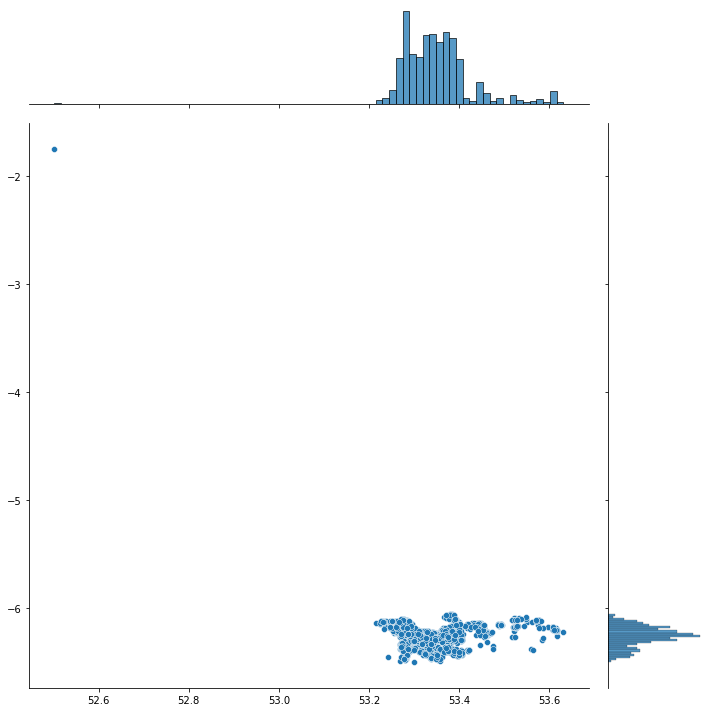

<function seaborn.utils.despine>

In [39]:
# plot the the latitude and longitude attributes (https://deepnote.com/@jz/House-prices-prediction-DuSZvuoNSEmb5cCKcsW4BQ)
plt.figure(figsize=(10,10))
sns.jointplot(x=df_train.Latitude.values, y=df_train.Longitude.values, size=10)
plt.ylabel('Longitude', fontsize=12)
plt.xlabel('Latitude', fontsize=12)
plt.show()
sns.despine

The houses for sale are concentrated in quite a small area however there is one outlier which we will remove, essentially the one that is less than longitude of '-2' and latitude less than '53.0'.

In [40]:
index_train = df_train[(df_train['Longitude'] > -2.0)|(df_train['Latitude'] < 53.0)].index
index_test = df_test[(df_test['Longitude'] > -2.0)|(df_test['Latitude'] < 53.0)].index
df_train.drop(index_train, inplace=True)
df_test.drop(index_test, inplace=True)
df_train['Longitude'].describe()

count    1637.000000
mean    -6.257841   
std      0.091825   
min     -6.497000   
25%     -6.309640   
50%     -6.247821   
75%     -6.194319   
max     -6.054719   
Name: Longitude, dtype: float64

<Figure size 720x720 with 0 Axes>

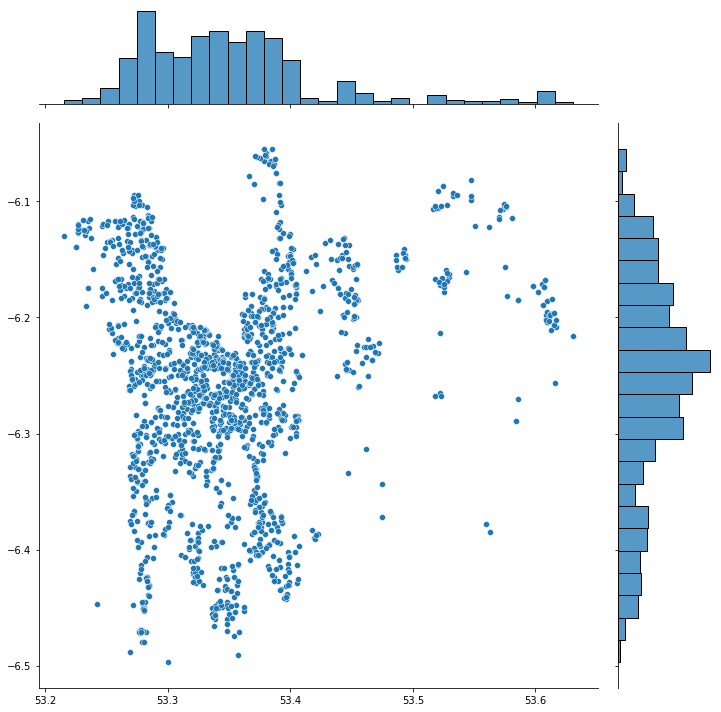

<function seaborn.utils.despine>

In [41]:
# plot the the Latitude and Longitude attributes (https://deepnote.com/@jz/House-prices-prediction-DuSZvuoNSEmb5cCKcsW4BQ)
plt.figure(figsize=(10,10))
sns.jointplot(x=df_train.Latitude.values, y=df_train.Longitude.values, size=10)
plt.ylabel('Longitude', fontsize=12)
plt.xlabel('Latitude', fontsize=12)
plt.show()
sns.despine

Natural language processing ([NLP](https://en.wikipedia.org/wiki/Natural_language_processing)) is a subfield of linguistics, computer science, and artificial intelligence.

* NLP concerned with the interactions between computers and human language.
* In particular how to program computers to process and analyze large amounts of natural language data. 
* The goal is a computer capable of "understanding" the contents of documents.
* Including the contextual nuances of the language within them. 
* The technology can then accurately extract information and insights contained in the documents.
* As well as categorize and organize the documents themselves. 

# NATURAL LANGUAGE PROCESSING

Your comments, explanation, and references here.

In [ ]:
# combine the text features, Description, Services and Features
# https://stackoverflow.com/questions/33158417/pandas-combine-two-strings-ignore-nan-values
df_train['Property_Description'] = df_train['Description'].fillna('') + ' ' + df_train['Services'].fillna('') + ' ' + df_train['Features'].fillna('')

In [ ]:
# drop the text features, Description, Services and Features
df_train.drop(['Description', 'Services', 'Features'], axis = 1, inplace = True)

In [ ]:
# show the first data frame row
df_train.head(2)

In [ ]:
# remove anything that is not a letter from the property description
df_train['Property_Description'] = [re.sub('[^a-zA-Z]', ' ', t) for t in df_train['Property_Description']]

In [ ]:
# make everything lowercase and remove all the leading and trailing spaces from the property description
df_train['Property_Description'] = df_train['Property_Description'].apply(lambda x: x.lower().strip())

In [ ]:
# remove duplicate spaces from the property description
df_train['Property_Description'] = df_train['Property_Description'].replace({' +':' '},regex=True)

In [ ]:
# remove single character words from the property description
df_train['Property_Description'] = df_train['Property_Description'].str.replace(r'\b\w\b','').str.replace(r'\s+', ' ')

In [ ]:
# remove duplicate spaces from the property description
df_train['Property_Description'] = df_train['Property_Description'].replace({' +':' '},regex=True)

In [ ]:
# import english stopwords with nltk so they can be filtered out before processing
# https://towardsdatascience.com/how-to-clean-text-data-639375414a2f
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
english_stopwords = stopwords.words('english')
df_train['Property_Description'] = df_train['Property_Description'].apply(lambda x: ' '.join([word for word in x.split() if word not in (english_stopwords)]))

In [ ]:
# show the first data frame row
df_train.head(1)

In [ ]:
# create the NLP function
from nltk.tokenize import word_tokenize  
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import *
nltk.download('punkt')
nltk.download('wordnet')

def nlp_preprocess(some_text):
  """
  Normalization using NLTK and spaCy
  """
  # 1. Tokenization
  NLP_token = word_tokenize(some_text)

  # 2. Stemming
  PS = PorterStemmer()
  NLP_stem = []
  for word in NLP_token:
      NLP_stem.append(PS.stem(word))

  # 3. Lemmatization
  WL = WordNetLemmatizer()
  NLP_lemma = []
  for word in NLP_stem:
      NLP_lemma.append(WL.lemmatize(word))
  
  # 4. Stopword   
  FS = []  
  NLP_stop = set(stopwords.words("english"))
  for w in NLP_lemma:  
      if w not in NLP_stop:  
        FS.append(w)
  
  # 5. Punctuation  
  punctuations = "?:!.,;"
  for word in FS:
      if word in punctuations:
          FS.remove(word)

  # convert list into a string
  # return string  
  return " ".join(FS)

  # print comparison
  print(" ")
  print(some_text)
  print(FS)

In [ ]:
# x = df_train.head(1)
# nlp_preprocess(str(x['Property_Description']))

In [ ]:
print(df_train['Property_Description'].iloc[0])
print(nlp_preprocess(df_train['Property_Description'].iloc[0]))

In [ ]:
df_train['Property_Description'] = df_train['Property_Description'].apply(lambda x: nlp_preprocess(x))

In [ ]:
# show the first data frame row
df_train.head(10)

In [ ]:
# show the first data frame row
df_train.head(1)

In [ ]:
# calculate the number of unique values in each column of the dataframe
nunique = df_train.nunique()
print(nunique)

# PIECEWISE REGRESSION

**Piecewise regression**, extract from [Wikipedia](https://en.wikipedia.org/wiki/Segmented_regression):

Segmented regression, also known as piecewise regression or broken-stick regression, is a method in regression analysis in which the independent variable is partitioned into intervals and a separate line segment is fit to each interval. 

* Segmented regression analysis can also be performed on 
multivariate data by partitioning the various independent variables. 
* Segmented regression is useful when the independent variables, clustered into different groups, exhibit different relationships between the variables in these regions. 

* The boundaries between the segments are breakpoints.

* Segmented linear regression is segmented regression whereby the relations in the intervals are obtained by linear regression. 

Your comments, explanation, and references here.

In [ ]:
# your code here

# BAYESIAN NN

A [Bayesian network](https://en.wikipedia.org/wiki/Bayesian_network) (also known as a Bayes network, Bayes net, belief network, or decision network) is a probabilistic graphical model that represents a set of variables and their conditional dependencies via a directed acyclic graph (DAG). 

* Bayesian networks are ideal for taking an event that occurred and predicting the likelihood that any one of several possible known causes was the contributing factor. 
* For example, a Bayesian network could represent the probabilistic relationships between diseases and symptoms. 
* Given symptoms, the network can be used to compute the probabilities of the presence of various diseases.

Your comments, explanation, and references here.

In [ ]:
# your code here

# SUMMARY

Your summary here.